In [165]:
import pandas as pd
import seaborn as sns
import os

os.chdir(r'C:\Users\Luis\desktop\INAPI\data\Registers')

#print(os.getcwd())

r = os.listdir()

df = []

for i in r:
    df.append(pd.DataFrame(pd.read_excel(i, sheet_name=0)))
    
df = pd.concat(df)

df["Year"] = df["ApplicationNumber"].astype(str).str[0:4]

   

In [122]:
df_macrozone = df[df["ApplicantRegion"].isin(["Maule", "Bío Bío", "Ñuble", "Libertador B. O'Higgins"])].copy()

d = df[df["Applicants"].str.contains("UNIVERSIDAD DE CONCEPCION", regex=True, na=False)]

d[d["ApplicantRegion"] == "No disponible"]

,ApplicationNumber,RegistrationNumber,Applicants,Representatives,Inventors,FilingDate,PublicationDate,RegistrationDate,ExpirationDate,Title,...,SubtypeName,Status,Country,ApplicantRegion,RepresentativeRegion,PCTApplicationDate,PCTPublicationDate,Priorities,LastUpdatedDate,Year
387,200302718,208,(CL) MARIA IRENE LEPEZ GARCIA.BR.(CL) UNIVERSI...,(CL) JAIME BAEZA HERNANDEZ Y OTROS.,(99) HERIBERTO BERNARDINO MOSCOSO ARAVENA...,2003-12-22 00:00:00,2007-01-19 00:00:00,2010-01-15,2013-12-22,DEPOSITO PARA CULTIVO SUSPENDIDO DE ORGANISMOS...,...,Modelo de utilidad,Caducada,CHILE,No disponible,No disponible,NaT,NaT,NaN,2021-05-22 06:15:06.653,2003
982,201503128,57419,(CL) UNIVERSIDAD DE CONCEPCION.BR.(US) RESEARC...,(CL) SEPÚLVEDA BARRERA XIMENA,"(CL) AGUAYO HERNANDEZ, LUIS GERARDO.BR.(CL) CE...",2015-10-23 10:49:30,2016-06-17 08:53:44,2019-05-27,2035-10-23,EL COMPUESTO N-(BUTAN-2-IL)-2-[3-(1H-INDOL-3-I...,...,Patente de invención,Registrada,ESTADOS UNIDOS DE AMERICA,No disponible,No disponible,NaT,NaT,NaN,2021-05-22 06:15:06.653,2015


In [123]:
df_macrozone.head()

,ApplicationNumber,RegistrationNumber,Applicants,Representatives,Inventors,FilingDate,PublicationDate,RegistrationDate,ExpirationDate,Title,...,SubtypeName,Status,Country,ApplicantRegion,RepresentativeRegion,PCTApplicationDate,PCTPublicationDate,Priorities,LastUpdatedDate,Year
358,200000398,44824,(CL) JORGE E. MORA LILLO (35%).BR.(CL) JUAN CA...,(CL) JAIME BAEZA HERNANDEZ.,(CL) FELIP IMPERATORE JUAN CARLOS,2000-02-23,2001-05-02,2009-03-05,2024-03-05,MURO ESTRUCTURAL Y PROCEDIMIENTO DE FABRICACIO...,...,Patente de invención,Registrada,CHILE,Bío Bío,Bío Bío,NaT,NaT,NaN,2021-05-22 06:15:06.653,2000
620,200101757,45191,(CL) UNIVERSIDAD DE CONCEPCION (50%).BR.(CL) W...,(CL) JAIME BAEZA H.,(CL) WILKOMIRSKY FUICA IGOR ANDRES EDUARDO,2001-07-25,2003-06-20,2009-07-28,2024-07-28,PROCESO PARA PRODUCIR ACIDO FOSFORICO A PARTIR...,...,Patente de invención,Registrada,CHILE,Bío Bío,Bío Bío,NaT,NaT,NaN,2021-05-22 06:15:06.653,2001
860,200202746,45036,(CL) ASERRADEROS QUELÉN QUELÉN S.A. (11%).BR.(...,(CL) JOHANSSON,(CL) BURKHARD SEEGER STEIN,2002-11-29,2003-10-10,2009-06-12,2024-06-12,PROCESO DE PETRIFICACION ACELERADA DE MATERIAL...,...,Patente de invención,Registrada,CHILE,Bío Bío,Bío Bío,NaT,NaT,NaN,2021-05-22 06:15:06.653,2002
884,200300080,45574,(CL) INSTITUTO DE FOMENTO PESQUERO.BR.(CL) UNI...,(CL) CLARKE,(CL) MARCO ANTONIO ABDON SALAMANCA ORREGO; HEC...,2003-01-17,2004-04-16,2009-09-28,2024-09-28,SISTEMA PARA REMOVER LOS DETRITOS CONTAMINANTE...,...,Patente de invención,Registrada,CHILE,Bío Bío,Bío Bío,NaT,NaT,NaN,2021-05-22 06:15:06.653,2003
1067,200400027,45608,(CL) UNIVERSIDAD DE CONCEPCION; MARIA JACQUELI...,(CL) JAIME G. BAEZA HERNANDEZ,(CL) MARIA JACQUELINE SEPULVEDA CARRENO; CARLO...,2004-01-08,2004-12-10,2009-10-06,2024-10-06,COMPOSICION FARMACEUTICA QUE COMPRENDE ACICLOV...,...,Patente de invención,Registrada,CHILE,Bío Bío,Bío Bío,NaT,NaT,NaN,2021-05-22 06:15:06.653,2004


In [124]:
df_macrozone["Applicants"] = df_macrozone["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")

stats = df_macrozone.groupby(["ApplicantRegion", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()

population = [
    {"ApplicantRegion": "Libertador B. O'Higgins", "Population": 914555},
    {"ApplicantRegion": "Maule", "Population": 1044950},
    {"ApplicantRegion": "Ñuble", "Population": 480609},
    {"ApplicantRegion": "Bío Bío", "Population": 1556805}
]

df_population = pd.DataFrame(population)
df_population

df_agg = stats[stats["Year"].isin(["2017", "2018", "2019"])].groupby(["ApplicantRegion"]).agg({"ApplicationNumber": "mean"}).reset_index()

df_agg = df_agg.merge(df_population, on="ApplicantRegion")
df_agg["Per Capita"] = 100000 * df_agg["ApplicationNumber"] / df_agg["Population"]

df_agg

C:\Users\Luis\anaconda3\envs\miambiente\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,ApplicantRegion,ApplicationNumber,Population,Per Capita
0,Bío Bío,19.000000,1556805,1.220448
1,Libertador B. O'Higgins,2.666667,914555,0.291581
2,Maule,2.666667,1044950,0.255196
3,Ñuble,1.000000,480609,0.208069


Text(0.5, 0, 'Región')

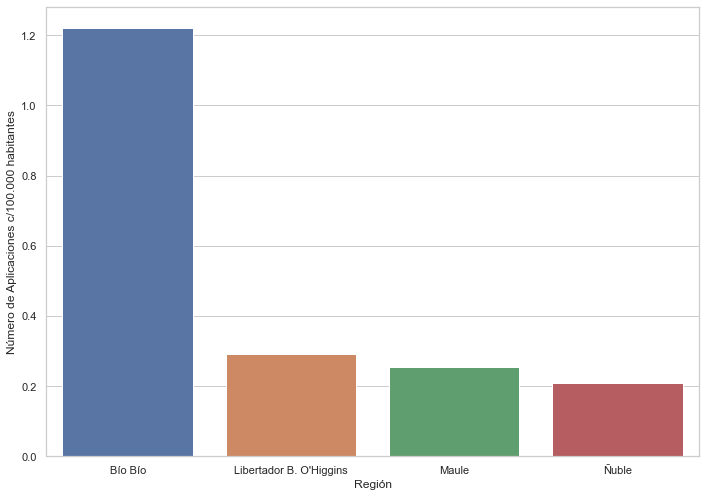

In [125]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="whitegrid")
ax = sns.barplot(x="ApplicantRegion", y="Per Capita", data=df_agg)
ax.set_ylabel("Número de Aplicaciones c/100.000 habitantes")
ax.set_xlabel("Región")

In [126]:
stats

,ApplicantRegion,Year,ApplicationNumber
0,Bío Bío,1999,1
1,Bío Bío,2000,2
2,Bío Bío,2001,4
3,Bío Bío,2002,1
4,Bío Bío,2003,3
5,Bío Bío,2004,7
6,Bío Bío,2005,14
7,Bío Bío,2006,3
8,Bío Bío,2007,17
9,Bío Bío,2008,11


In [169]:
df_macrozone2 = df_macrozone

df_macrozone2['Applicants'] = df_macrozone2["Applicants"].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(".", "")

stats2 = df_macrozone2.groupby(["Applicants", "Year"]).agg({"ApplicationNumber": "nunique"}).reset_index()


df_agg2 = stats2[stats2["Year"].isin(["2012"])].groupby(["Applicants"]).agg({"ApplicationNumber": "mean"}).reset_index()



df_agg2


C:\Users\Luis\anaconda3\envs\miambiente\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Applicants,ApplicationNumber
0,(CL) ABASOLO VALLEJO SA,1
1,(CL) AGUAYO ALIAGA HECTOR EDUARDO,1
2,"(CL) BOBENRIETH, GIGLIO, GUILLERMO",1
3,(CL) FORJA Y RECICLAJES INDUSTRIALES SA,1
4,"(CL) GARCIA VENEGAS, MARCO ANTONIO",1
5,(CL) GUTIERREZ CERDA RODRIGO ALEJANDRO,1
6,(CL) MARIO MIGUEL GUERRERO MENDEZ,1
7,(CL) PATRICIO CONTRERAS DANECK,1
8,(CL) UNIVERSIDAD DE CONCEPCION,12
9,(CL) UNIVERSIDAD DEL BIO BIO,1
